First 5 rows of our data:
      Date  Rainfall  Tmin  Tmax  Discharge
0  1990-01      87.5   2.0   9.6      101.9
1  1990-02     102.9   8.1  11.6      111.9
2  1990-03     133.0   8.8  18.3      136.4
3  1990-04     152.8  12.7  26.9      177.4
4  1990-05     119.8  14.4  27.3      137.0

Basic information about our data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       360 non-null    object 
 1   Rainfall   360 non-null    float64
 2   Tmin       360 non-null    float64
 3   Tmax       360 non-null    float64
 4   Discharge  360 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.2+ KB
None

Model Evaluation:
R-squared Score: 0.8907

Linear Regression Equation:
Discharge = 41.33 + 0.76 * Rainfall

Prediction for 50 mm rainfall: 79.55 cubic meters/second


C:\Users\CWC\anaconda3\envs\python-wrm\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


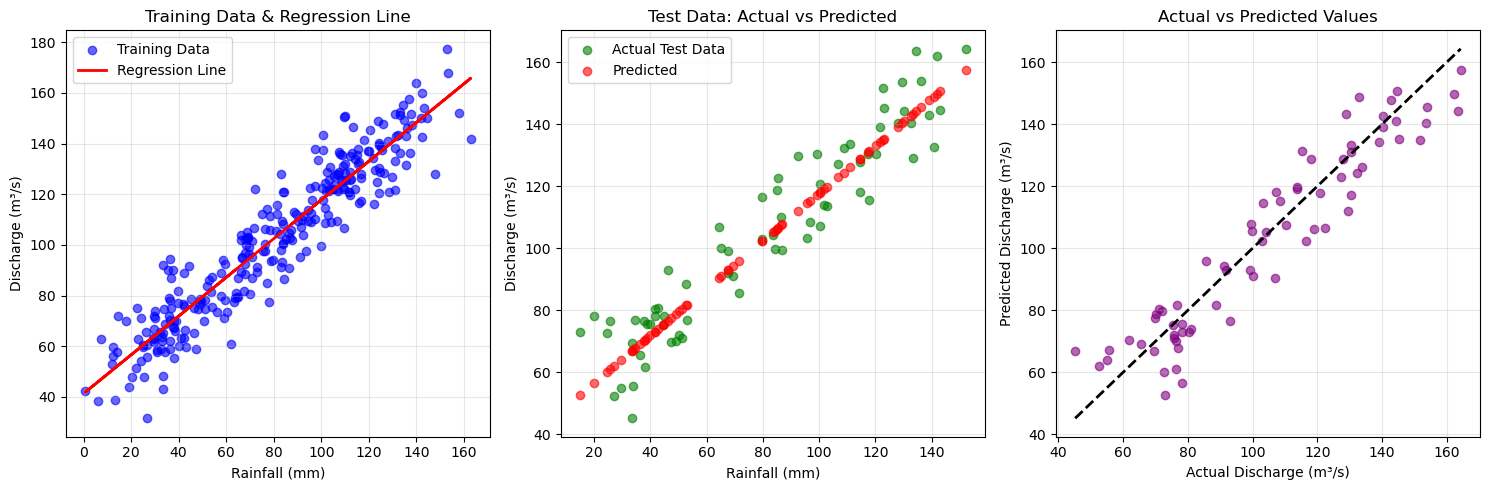


Additional Model Insights:
Model Coefficient (slope): 0.7644
Model Intercept: 41.3286
Mean Squared Error: 103.1155

Sample Predictions vs Actual Values:
Rainfall: 84.2 mm -> Predicted: 105.69 m³/s, Actual: 99.90 m³/s
Rainfall: 95.7 mm -> Predicted: 114.48 m³/s, Actual: 103.20 m³/s
Rainfall: 120.2 mm -> Predicted: 133.21 m³/s, Actual: 130.40 m³/s
Rainfall: 122.6 mm -> Predicted: 135.05 m³/s, Actual: 151.60 m³/s
Rainfall: 114.5 mm -> Predicted: 128.85 m³/s, Actual: 118.20 m³/s


In [1]:
# Import necessary libraries
import pandas as pd  # For reading and working with data
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LinearRegression  # The machine learning model we'll use
from sklearn.metrics import r2_score  # To check how good our model is

# Read the CSV file containing our data
# The file should have three columns: Year-Month, Rainfall, Discharge
data = pd.read_csv('Discharge_30years.csv')  # Replace 'river_data.csv' with your actual file name

# Display the first few rows to understand the data structure
print("First 5 rows of our data:")
print(data.head())

# Display basic information about our data
print("\nBasic information about our data:")
print(data.info())



# Prepare the data for machine learning
# We'll use Rainfall as input (X) to predict Discharge as output (y)
X = data[['Rainfall']]  # Double brackets because we need 2D array (even with one feature)
y = data['Discharge']    # Single brackets for output (1D array)

# Split the data into training set (80%) and testing set (20%)
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
# The model learns the relationship between Rainfall and Discharge
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared score to evaluate our model
# R-squared tells us how well our model fits the data (0 = bad, 1 = perfect)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"R-squared Score: {r2:.4f}")  # Format to 4 decimal places

# Display the linear regression equation
# The model learned: Discharge = intercept + coefficient * Rainfall
print(f"\nLinear Regression Equation:")
print(f"Discharge = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Rainfall")

# Let's make a prediction for a new rainfall value
new_rainfall = [[50]]  # Example: 50 mm of rainfall
predicted_discharge = model.predict(new_rainfall)
print(f"\nPrediction for {new_rainfall[0][0]} mm rainfall: {predicted_discharge[0]:.2f} cubic meters/second")


# Create visualizations to understand our model better

# Plot 1: Original data points
plt.figure(figsize=(15, 5))

# Subplot 1: Training data with regression line
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Discharge (m³/s)')
plt.title('Training Data & Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Test data predictions
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Actual Test Data')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Discharge (m³/s)')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Perfect prediction line
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Discharge (m³/s)')
plt.ylabel('Predicted Discharge (m³/s)')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional metrics for better understanding
print("\nAdditional Model Insights:")
print(f"Model Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

# Calculate mean squared error manually to understand prediction errors
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

# Show some example predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(min(5, len(X_test))):
    print(f"Rainfall: {X_test.iloc[i,0]:.1f} mm -> Predicted: {y_pred[i]:.2f} m³/s, Actual: {y_test.iloc[i]:.2f} m³/s")

